# Obligatorio 1 - Algoritmos

Nombre del estudiante: Agustín Corujo, Matías Ibáñez

Debajo de cada pregunta o tarea incluya las celdas necesarias para desarrollar la respuesta. Puede usar una o varias celdas de código o mark down (https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook)

Para entregar, renombrar este notebook como "Obligatorio 1 - Apellido Nombre" 


## Problema 1
### Ejercicio 1
#### Parte a)
Implementar en python el binary search: busca un elemento en un arreglo/lista ordenado empezando por la mitad y descartando mitades). Implementar estos algoritmos en forma NO recursiva.

In [2]:
import time
def binary_search(elements: list[float], target: float) -> int:
    izq = 0
    der = len(elements) - 1
    while izq <= der:
        time.sleep(0.2)
        mitad = (izq + der) // 2
        # Si el elemento medio es el objetivo, devolver su índice
        if elements[mitad] == target:
            return mitad
        # Si el objetivo está en la mitad izquierda, ajustar el límite derecho
        elif elements[mitad] > target:
            der = mitad - 1
        # Si el objetivo está en la mitad derecha, ajustar el límite izquierdo
        else:
            izq = mitad + 1
    # Si el objetivo no está presente en la lista, devolver -1
    return -1

#### Parte b)
Implementar en python find_min (busca el mínimo elemento de un sub-arreglo/lista y retorna su índice).

In [3]:
def find_min(elements: list[float], from_index: int, to_index: int) -> int:
    if len(elements)==0: return -1
    indice_buscado=from_index
    for posicion in range(from_index+1,to_index):
        if(elements[posicion] < elements[indice_buscado] ):
            indice_buscado = posicion
    return indice_buscado

#### Parte c)
Implementar en python selection sort (ordena el arreglo empezando por buscar el mínimo e intercambiándolo por el del primer lugar, luego busca el mínimo del resto de la lista y lo intercambia
por el del segundo lugar, etc).

In [4]:
def selection_sort(elements: list[float]) -> list[float]:
    for i in range(len(elements)):
        posicion_minimo = find_min(elements,i,len(elements))
        aux=elements[i]
        elements[i]=elements[posicion_minimo]
        elements[posicion_minimo]=aux
    return elements

## Ejercicio 2
Crear Unit Tests para binary_search, fin_min, selection_stort
Implementar en python utilizando http://docs.python.org/2/library/unittest.html unit test para los tres algoritmos implementados.

In [5]:
import unittest

class TestBinarySearch(unittest.TestCase):
    def test_binary_search(self):
        # Caso de prueba con una lista desordenada
        lista_desordenada = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
        self.assertEqual(binary_search(lista_desordenada, 11), 5)

        # Caso de prueba con una lista vacía
        lista_vacia = []
        self.assertEqual(binary_search(lista_vacia, 5), -1)

        # Caso de prueba con una lista que no contiene el elemento buscado
        lista_no_contiene = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
        self.assertEqual(binary_search(lista_no_contiene, 6), -1)

        # Caso de prueba con una lista que contiene un solo elemento
        lista_un_elemento = [42]
        self.assertEqual(binary_search(lista_un_elemento, 42), 0)

        # Caso de prueba con una lista que contiene el mismo elemento repetido
        lista_repetidos = [7, 7, 7, 7, 7]
        self.assertEqual(binary_search(lista_repetidos, 7), 2)

        # Caso de prueba con una lista que contiene elementos negativos
        lista_negativos = [-5, -3, -1, 0, 2, 4, 6, 8]
        self.assertEqual(binary_search(lista_negativos, -1), 2)

        # Caso de prueba con una lista que contiene números flotantes
        lista_floats = [1.1, 2.2, 3.3, 4.4, 5.5]
        self.assertEqual(binary_search(lista_floats, 4.4), 3)

# Crear una instancia de la clase de prueba y ejecutar las pruebas
unittest.main(argv=[''], exit=False)


.
----------------------------------------------------------------------
Ran 1 test in 2.818s

OK


In [6]:
import unittest
class TestFindMin(unittest.TestCase):
    def test_find_min(self):
        # Caso de prueba con una lista desordenada
        lista_desordenada = [54, 23, 78, 12, 45, 87, 32, 65, 19, 90]
        indice_esperado_desordenado = 3
        self.assertEqual(find_min(lista_desordenada, 0, len(lista_desordenada)), indice_esperado_desordenado)

        # Caso de prueba con una lista vacía
        lista_vacia = []
        int_esperado = -1
        self.assertEqual(find_min(lista_vacia, 0, len(lista_vacia)), int_esperado)

        # Caso de prueba con una lista ya ordenada
        lista_ordenada = [1, 2, 3, 4, 5]
        indice_esperado_ordenado = 0
        self.assertEqual(find_min(lista_ordenada, 0, len(lista_ordenada)), indice_esperado_ordenado)

        # Caso de prueba con una lista inversamente ordenada
        lista_inversa = [5, 4, 3, 2, 1]
        indice_esperado_inverso = 4
        self.assertEqual(find_min(lista_inversa, 0, len(lista_inversa)), indice_esperado_inverso)

        # Caso de prueba con una lista que contiene elementos repetidos
        lista_repetidos = [7, 7, 7, 7, 7]
        indice_esperado_repetidos = 0
        self.assertEqual(find_min(lista_repetidos, 0, len(lista_repetidos)), indice_esperado_repetidos)

        # Caso de prueba con una lista que contiene elementos negativos
        lista_negativos = [-5, -3, -7, -2, -8]
        indice_esperado_negativos = 4
        self.assertEqual(find_min(lista_negativos, 0, len(lista_negativos)), indice_esperado_negativos)

# Crear una instancia de la clase de prueba y ejecutar las pruebas
unittest.main(argv=[''], exit=False)


..
----------------------------------------------------------------------
Ran 2 tests in 2.811s

OK


In [7]:
import unittest
class TestSelectionSort(unittest.TestCase):
    def test_selection_sort(self):
        # Caso de prueba con una lista desordenada
        lista_desordenada = [54, 23, 78, 12, 45, 87, 32, 65, 19, 90]
        resultado_esperado = [12, 19, 23, 32, 45, 54, 65, 78, 87, 90]
        self.assertEqual(selection_sort(lista_desordenada), resultado_esperado)

        # Caso de prueba con una lista vacía
        lista_vacia = []
        resultado_esperado_vacio = []
        self.assertEqual(selection_sort(lista_vacia), resultado_esperado_vacio)

        # Caso de prueba con una lista ya ordenada
        lista_ordenada = [1, 2, 3, 4, 5]
        resultado_esperado_ordenado = [1, 2, 3, 4, 5]
        self.assertEqual(selection_sort(lista_ordenada), resultado_esperado_ordenado)

        # Caso de prueba con una lista inversamente ordenada
        lista_inversa = [5, 4, 3, 2, 1]
        resultado_esperado_inverso = [1, 2, 3, 4, 5]
        self.assertEqual(selection_sort(lista_inversa), resultado_esperado_inverso)

        # Casos de prueba adicionales
        lista_un_elemento = [42]
        resultado_esperado = [42]
        self.assertEqual(selection_sort(lista_un_elemento), resultado_esperado)

        lista_repetidos = [7, 7, 7, 7, 7]
        resultado_esperado_repetidos = [7, 7, 7, 7, 7]
        self.assertEqual(selection_sort(lista_repetidos), resultado_esperado_repetidos)

        lista_negativos = [-5, -3, -7, -2, -8]
        resultado_esperado_negativos = [-8, -7, -5, -3, -2]
        self.assertEqual(selection_sort(lista_negativos), resultado_esperado_negativos)

# Crear una instancia de la clase de prueba y ejecutar las pruebas
unittest.main(argv=[''], exit=False)


...
----------------------------------------------------------------------
Ran 3 tests in 2.817s

OK


## Ejercicio 3
Usando matplotlib (https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html) crear una gráfica con los tiempos de ejecución. 
Es decir computar la duración del algoritmo para distintos n (el tamaño del arreglo/lista). 
Tomar el máximo n suficientemente grande de tal forma que correr tome algunos minutos. Si fuera necesario, puede agregar sleep() junto a las instrucciones para enlentencer el procesamiento (https://www.programiz.com/python-programming/time/sleep)  



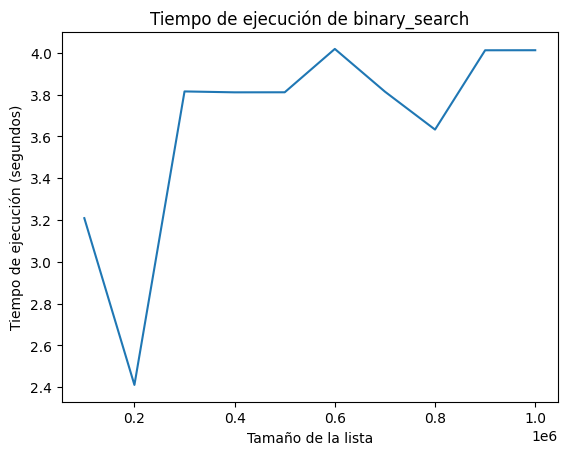

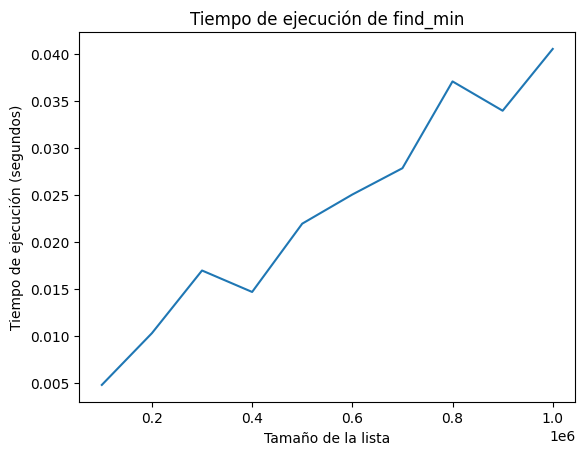

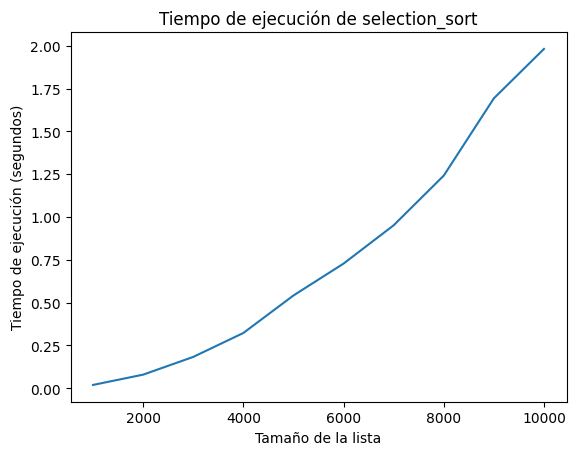

In [29]:
import time
import random
import matplotlib.pyplot as plt

def generate_random_list(size, min_val=0, max_val=100):
    return [random.uniform(min_val, max_val) for _ in range(size)]

sizes = [100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]  # Tamaños de las listas

# -------  -------  -------  -------  -------  -------  -------  -------  -------  -------
# Graficar para binary_search
times_binary_search = []
for size in sizes:
    elements =[]
    for i in range(size):
        elements.append(i)
    # elements = [x for x in range(1, size)] # hay q ver q aca salga una lista ordenada
    start_time = time.time()
    binary_search(elements,random.choice(elements))
    end_time = time.time()
    times_binary_search.append(end_time - start_time)

plt.plot(sizes, times_binary_search)
plt.xlabel('Tamaño de la lista')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución de binary_search')
plt.show()

# -------  -------  -------  -------  -------  -------  -------  -------  -------  -------
# Graficar para find_min
times_find_min = []
for size in sizes:
    elements = generate_random_list(size)
    start_time = time.time()
    find_min(elements, 0, len(elements))
    end_time = time.time()
    times_find_min.append(end_time - start_time)

plt.plot(sizes, times_find_min)
plt.xlabel('Tamaño de la lista')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución de find_min')
plt.show()

# -------  -------  -------  -------  -------  -------  -------  -------  -------  -------
# Graficar para selection_sort
sizes = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]  # Tamaños de las listas
times_selection_sort = []
for size in sizes:
    elements = generate_random_list(size)
    start_time = time.time()
    selection_sort(elements.copy())
    end_time = time.time()
    times_selection_sort.append(end_time - start_time)

plt.plot(sizes, times_selection_sort)
plt.xlabel('Tamaño de la lista')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución de selection_sort')
plt.show()


# Problema 2
Utilizar Latex y Markdowns para la notación matemática.
1. Dar una prueba para selection sort implementado en el Problema 1. 
2. Encontrar la función de tiempo (peor caso) para el selection sort dando también el órden de crecimiento (big-O)
3. Dar una prueba para binary search implementado en el Problema 1. 
4. Encontrar la función de tiempo (peor caso) para el binary search  dando también el órden de crecimiento (big-O)

### 1. Dar una prueba para selection sort implementado en el Problema 1. 
Para demostrar selection sort tambien vamos a demostrar a find min porque lo utilizamos adentro del algoritmo:



In [9]:
def find_min(elements: list[float], from_index: int, to_index: int) -> int:
    if len(elements)==0: return -1
    indice_buscado=from_index
    for posicion in range(from_index+1,to_index):
        if(elements[posicion] < elements[indice_buscado] ):
            indice_buscado = posicion
    return indice_buscado

Invariante: Al principio de cada iteracion del loop la variable indice_buscado contiene la posicion del menor elemento del subarray elementos[from_index:posicion-1] 

Inicializacion: En la primera iteracion posicion = from_index+1 y indice_buscado = from_index y el minimo del subarray elementos[posicion:posicion] es from_index es decir el primer y unico valor de ese subarray. 

Mantenimiento:Sabiendo que indice_buscado tiene el minimo desde elements[from_index:posicion-1] ==> el for pasa al siguiente elemento y si fija si es minimo o no si es cambio y si no sigue el que estaba antes por lo que el indice buscado 

Terminacion:Suponiendo que hay un caso to_index+1 entonces al entrar al loop se que indice_buscado contiene la posicion del minimo del subarray elements[from_index:to_index] al finalizar el loop indice_buscado tiene la posicion del minimo buscado.

In [10]:
#igual q el codigo de arriba, le cambiamos el nombre para q no interfiera 
def selection(elements: list[float]) -> list[float]:                
    for i in range(len(elements)):                                  
        posicion_minimo = find_min(elements,i,len(elements))        
        aux=elements[i]                                             
        elements[i]=elements[posicion_minimo]                       
        elements[posicion_minimo]=aux                               
    return elements

Selection sort:

Loop invariant: En la iteracion i, la sublista elements[0:i-1] va a contener a los elementos mas chicos de la lista elements y va a estar ordenada en orden ascendente. 

Inicializacion: Cuando i=1 elements[0:0] va a estar ordenada, ya que va a estar vacia

Mantenimiento: Sabiendo que elements[0:i-1] va a estar ordenada cuando este en la iteracion  i, hago el find_min en elements[i:] y hago el swap de ese elemento minimo por i, por lo tanto elements[0:i] van a estar ordenados

Finalizacion:
range(len(elements)) = n
Supongamos que hay un caso n+1 entonces al entrar al loop se que por la invariante elements[0:(n+1)-1] esta ordenado es decir elements[0:n] quedo ordenado, por lo tanto my array quedo ordenado.

### 2. Encontrar la función de tiempo (peor caso) para el selection sort dando también el órden de crecimiento (big-O)
Sabiendo que la funcion find min Tiene $$f(n) = \mathcal{O}(n)$$ ya que recorre el subarray para encontrar el menor numero y que esta funcion esta adentro del for del selection sort, podemos concluir que haremos algo que demora n, n veces de tal manera que el orden de nuestro algoritmo es  $$f(n) = \mathcal{O}(n^2)$$


### 3. Dar una prueba para binary search implementado en el Problema 1. 
Invariante: Al principio de cada iteracion izq es mas chico o igual que target y der es mas grande o igual que target. Denotando un rango entre izq y der en el que target tiene que estar.

Inicializacion :Sabiendo que esta ordenado target en la primera iteracion va a estar entre izquierda y derecha.Ya que el array inicial va a ser elements[izq:der] entonces target esta en el rango.

Mantenimiento: A medida que el algoritmo funciona el rango entre izquierda y derecha se va diviendo por dos pero target se mantiene adentro de este rango. Se compara target con el valor medio entre izq y der si se sigue subidiviendo de manera que izq pasa a ser mid+1 o der pasa a ser mid-1 pero target seguira en el rango.

Finalizacion: Se sigue subdividiendo hasta que mid((izq+der)//2) = target encontrando la posicion del elemento buscado. Y target sigue entre el rango de izq y der.



### 4. Encontrar la función de tiempo (peor caso) para el binary search  dando también el órden de crecimiento (big-O)

Los peores casos se van a dar cuando el elemento buscado este en la posicion al inicio o al final ya que sera la maxima cantidad de subdivisiones que se tendran que hacer siendo p la cantidad de subdivisones supongamos que el elemento buscado esta en la mitad por lo que tendre que hacer $$n/2$$ si esta en la mitad de esta mitad $$n/4$$ y asi sucesivamente si esta al comienzo tengo que dividir n tantas veces como para que me de la posicion inicial, estas tantas subdivisiones las llamo p y lo busco $$(n/2^p)=1$$ encontrando p $$n=2^p$$  $$p=logn$$.
La distancia si me tuviera que mover hacia al final seria la misma, la cantidad de subdivisiones serian iguales por lo que el tiempo para llegar al ultimo elemento tambien es $$f(n) = \mathcal{O}(log n)$$. 

## Problema 3
Resolver el problema 2-4 de CLRS




### a)
posicion=[1,2,3,4,5]
array=    [2,3,8,6,1]

1. [1] --> [5]
2. [2] --> [5]
3. [3] --> [5]
4. [4] --> [5]
5. [3] --> [4]

Inversiones(con los indices)= $$[<1,5>,<2,5>,<3,5>,<4,5>,<3,4>]$$

### b)

El array con mas inversiones seria el array que va desde n hasta el 1  $$[n,n-1,n-2....,2,1]$$ya que $$<n,n-1>$$ sera una inversion $$<n,n-2>$$ asi sucesivamente hasta $$<n,1>$$ tambien $$<n-1,n-2>$$ seran inversiones y igual que con n sucesivamente hasta el 1 tambien. Entonces la cantidad total de inversiones seria una sumatoria de 1 a n de n-i $$\sum_{i=1}^{n} (n - i)$$
 nos queda un total de $$n^2/2-n/2$$

### c What is the relationship between the running time of insertion sort and the number of inversions in the input array? Justify your answer

La relacion es casi directamente proporcional ya que cuantos mas inversiones mas swaps tu insertion sort va a a tener que hacer para dejar la lista ordenada intercambiando los elementos mas chicos por los mas grandes a medida que se va iterando.
Supongamos el caso anterior en la parte b en la que se habla sobre la cantidad maxima de inversiones, si le aplicaramos un insertion sort a esa lista que contiene los elementos 
[n,n-1,.....2,1] se tendria que swapear por cada elemente anterior cada vez que se itera.

### d Give an algorithm that determines the number of inversions in any permutation on n elements in ‚.nlgn/ worst-case time. (Hint: Modify merge sort.)

In [30]:
import math

inversions = 0

def merge_sort(A, p, r):
    if p < r:
        q = (p + r) // 2
        merge_sort(A, p, q)
        merge_sort(A, q + 1, r)
        merge(A, p, q, r)
    return inversions

def merge(A, p, q, r):
    global inversions
    n1 = q - p + 1
    n2 = r - q

    L = [0] * (n1 + 1)
    R = [0] * (n2 + 1)

    for i in range(n1):
        L[i] = A[p + i]

    for j in range(n2):
        R[j] = A[q + j + 1]

    L[n1] = math.inf
    R[n2] = math.inf

    i = j = 0

    for k in range(p, r + 1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1
            inversions += n1-i  
    return A

array = [98,97,94,90,87,43,56,12,11,1,17,2,3,3,3,100,120,123,43,5433,243,1312,312,454,3754,7547,54]
print("Número de inversiones:", merge_sort(array, 0, len(array) - 1))


Número de inversiones: 123


Utilizamos el algoritmo de MergeSort que vimos en clase. Lo unico que agregamos: un contador de inversiones. Dado que Merge Sort es un algoritmo recursivo, es complicado mantener un contador de inversiones dentro de las funciones recursivas, ya que se modificaría constantemente.

Por lo tanto, colocamos el contador de inversiones fuera de las funciones principales. La lógica detrás del contador de inversiones se basa en el hecho de que, durante la fase de combinar de las listas, si un elemento de la lista derecha es menor que un elemento de la lista izquierda, sabemos que habrá una inversión. Esto se debe a que su posición será mayor que la del elemento de la izquierda y su valor sera menor.

Para calcular el número de inversiones, utilizamos la cuenta $$n1-i$$
n1−i, donde  n1 es la longitud de la lista izquierda y i es el índice del elemento actual en la lista izquierda. La razón de esta cuenta es que todos los elementos a la derecha del índice actual también serán inversiones, pero debemos restar la cantidad de elementos que no son inversiones antes del índice actual.  